url : https://www.kaggle.com/milanzdravkovic/pharma-sales-data?select=salesdaily.csv

In [1]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading dataset
df=pd.read_csv("Suresh_dataset.csv",parse_dates=["Date"], index_col="Date")

In [3]:
df.head(5)

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
Date,,,,,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [4]:
# finding null values
df.isnull().sum()

M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
dtype: int64

In [5]:
df.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-04', '2014-01-05',
               '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09',
               '2014-01-10', '2014-01-11',
               ...
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04', '2019-10-05', '2019-10-06',
               '2019-10-07', '2019-10-08'],
              dtype='datetime64[ns]', name='Date', length=2106, freq=None)

# time series analysis
#### Show any trends including any long term consistent trend,
#### long term cycle, seasonal or short-term cycles, and residual variation.

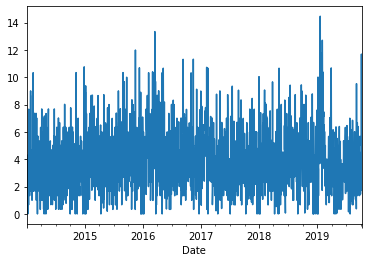

In [6]:
#ploting time series analysis for M01AE drug sales
df['M01AE'].plot()

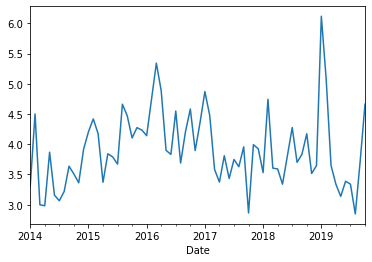

In [7]:
# below plot shows monthly trends
df['M01AE'].resample('M').mean().plot()

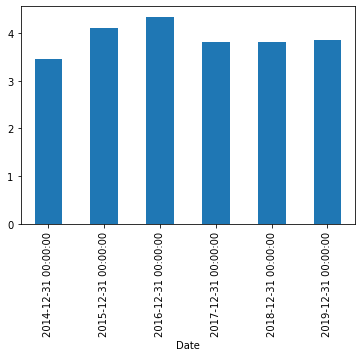

In [8]:
df['M01AE'].resample('Y').mean().plot(kind='bar')

<Figure size 1080x720 with 0 Axes>

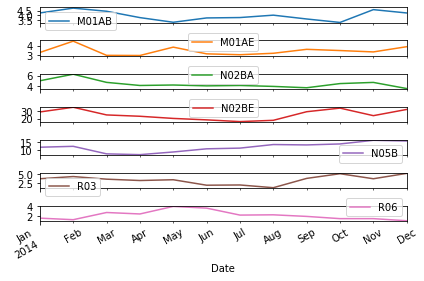

In [9]:
# taken only 2014 data and ploted by using monthly mean value to analyse the trends.
plt.figure(figsize=(15,10))
df_2014=df.loc['2014']
data_2014=df_2014[['M01AB','M01AE','N02BA','N02BE','N05B','R03','R06']]
data_2014.resample('M').mean().plot(subplots=True)
plt.tight_layout()

In [10]:
df2=df.drop(['Weekday Name','Hour','Month','Year'], axis = 1)
df2.head(1)

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
Date,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.4,7.0,0.0,0.0,2.0


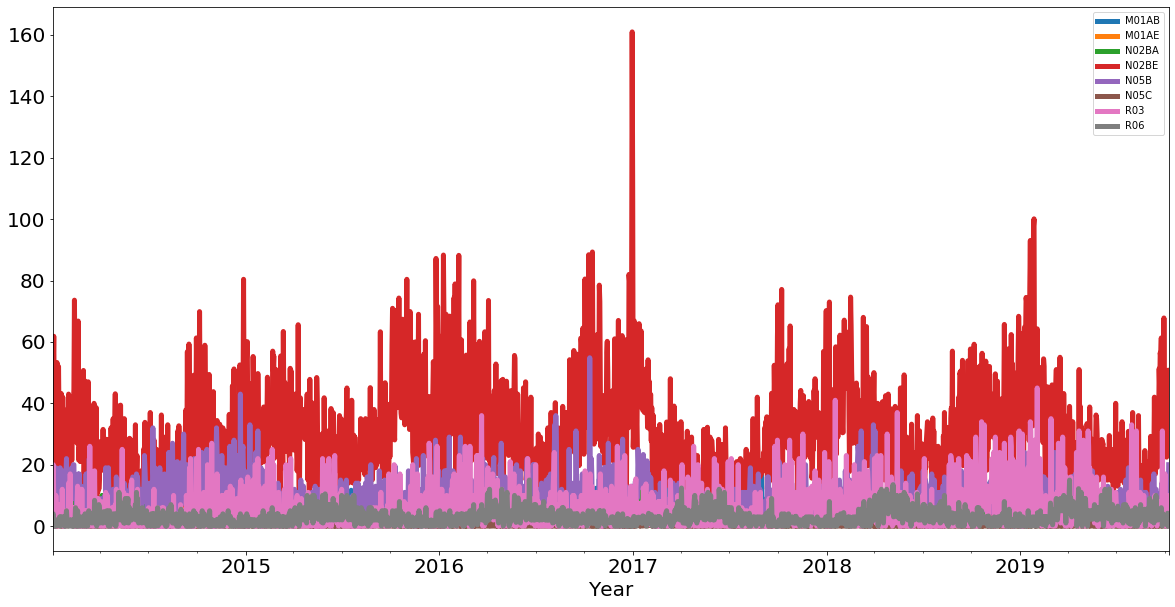

In [11]:
#this plot shows the seasonal sales
df2.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

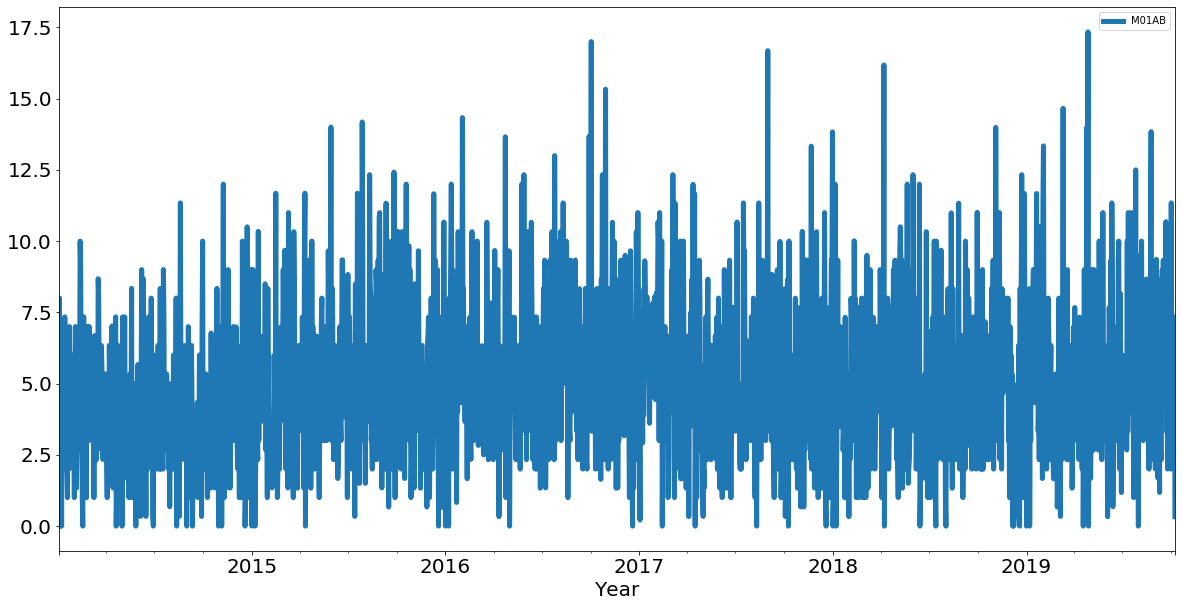

In [12]:
df[['M01AB']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

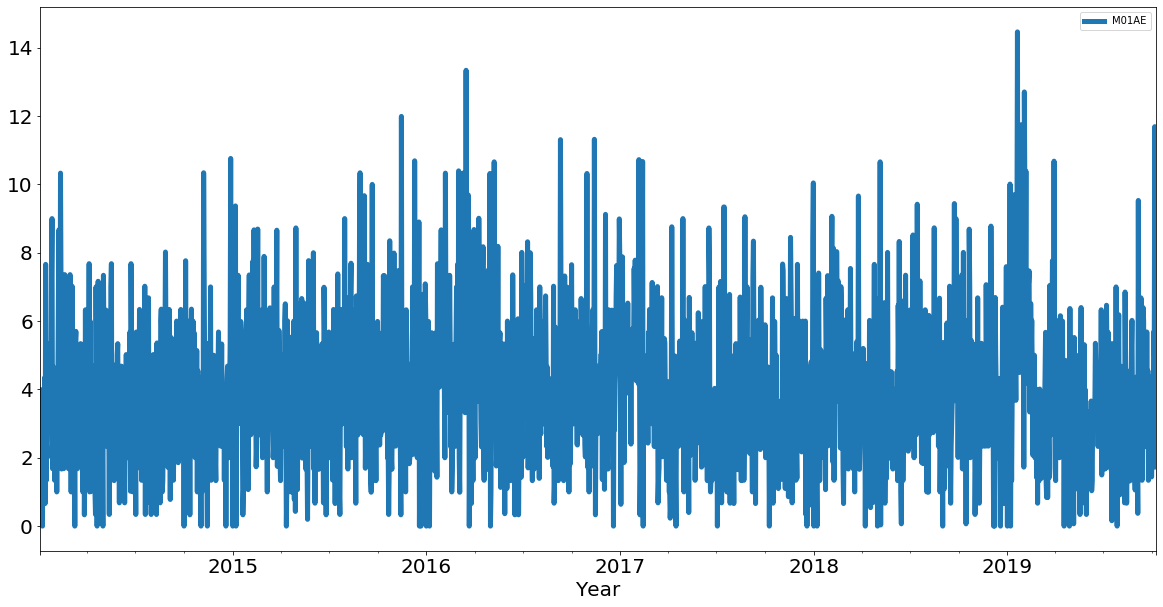

In [13]:
df[['M01AE']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

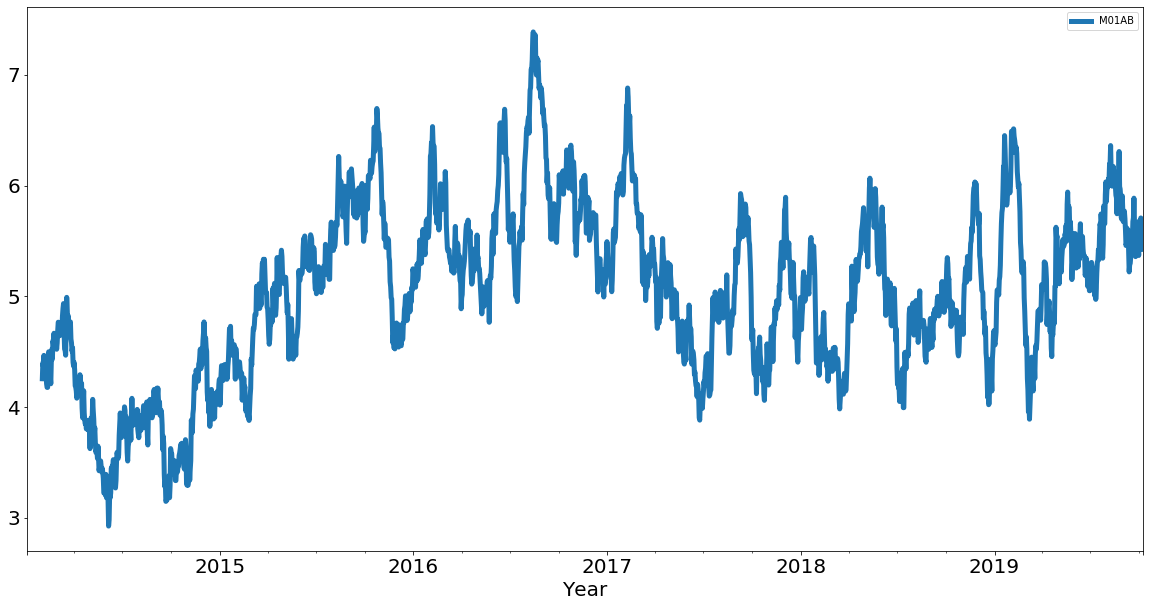

In [14]:
#Identifying Trends in Time Series by using rolling avarage
M01AB = df[['M01AB']]
M01AB.rolling(30).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

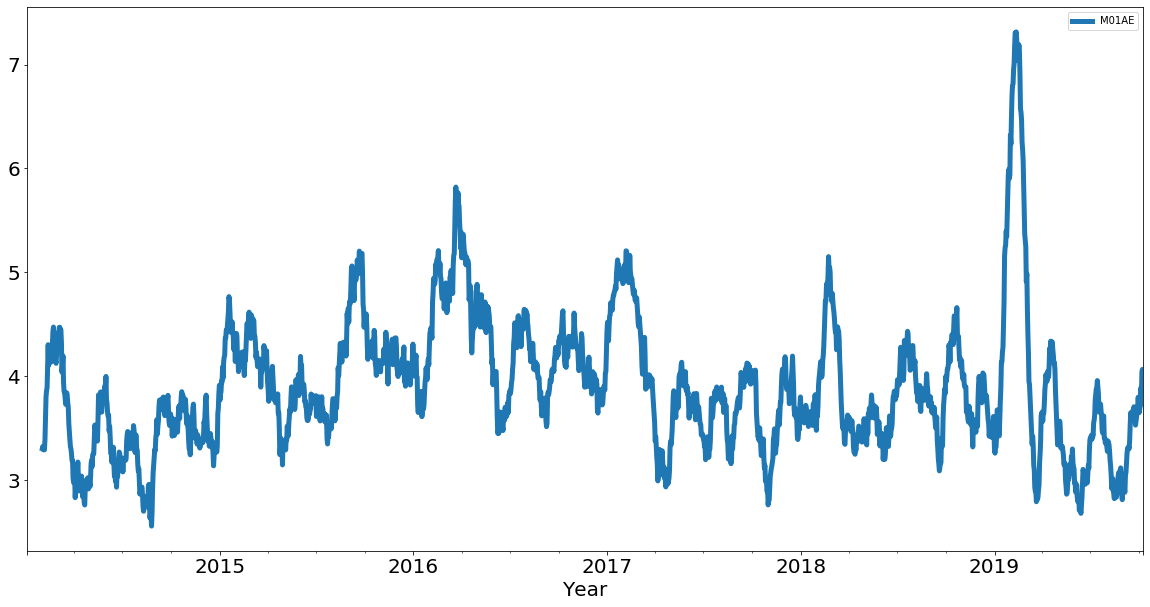

In [15]:
M01AE = df[['M01AE']]
M01AE.rolling(30).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

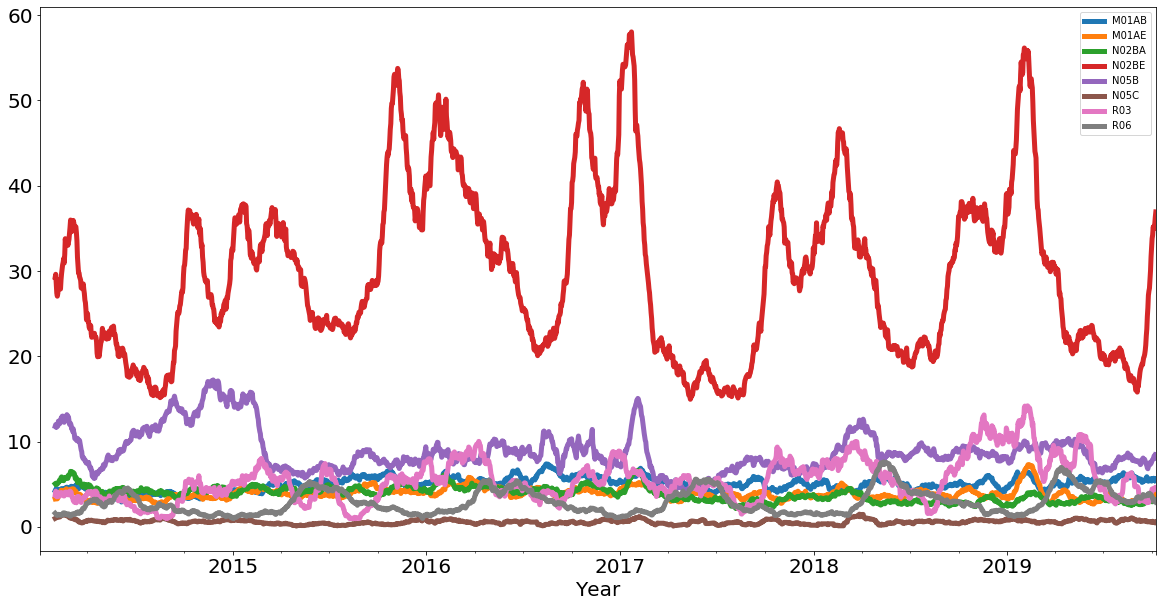

In [16]:
# finding trends of all drugs sales of the dataset
N02BA=df[['N02BA']]
N02BE=df[['N02BE']]
N05B=df[['N05B']]
R03=df[['R03']]
R06=df[['R06']]
df2.rolling(30).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

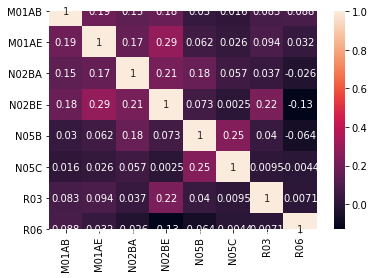

In [17]:
# finding correlation between the variables
sns.heatmap(df2.corr(), annot=True)

               M01AB     M01AE     N02BA      N02BE       N05B      N05C  \
Date                                                                       
2014-01-31  4.256333  3.303000  5.070000  29.267667  11.800000  1.000000   
2014-02-28  4.761429  4.501786  6.321429  35.782143  12.392857  1.107143   
2014-03-31  4.433548  2.998387  4.763065  25.137903   7.483871  0.645161   
2014-04-30  3.770000  2.982500  4.171667  23.283333   6.966667  0.600000   
2014-05-31  3.283548  3.868806  4.261290  20.283226   8.709677  0.741935   
2014-06-30  3.735667  3.157000  4.096667  18.274167  10.766667  0.766667   
2014-07-31  3.776129  3.064839  4.170968  15.867742  11.225806  0.677419   
2014-08-31  4.025484  3.218710  3.993548  17.656452  13.548387  0.935484   
2014-09-30  3.626000  3.636467  3.736667  29.594000  13.300000  0.466667   
2014-10-31  3.264355  3.508107  4.533468  34.617319  13.937500  0.633065   
2014-11-30  4.602667  3.362000  4.756667  24.126667  16.300000  0.633333   
2014-12-31  

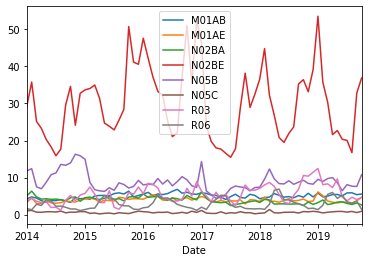

In [20]:
#Running this example prints the first 12 months of average monthly minimum sales.
resample = df2.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(12))
monthly_mean.plot()
plt.show()

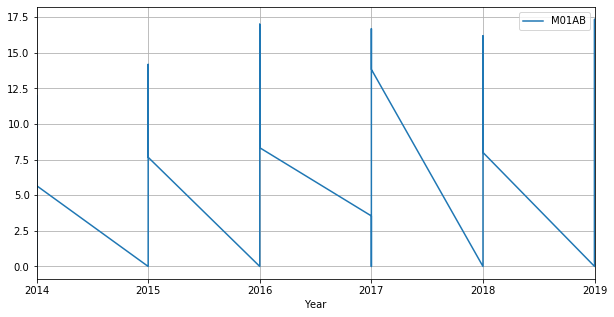

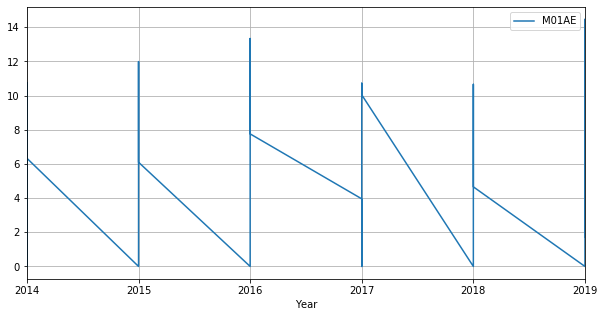

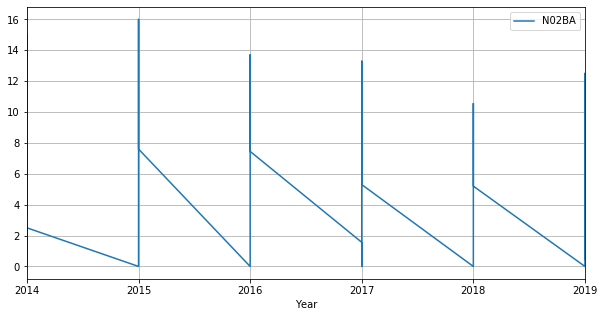

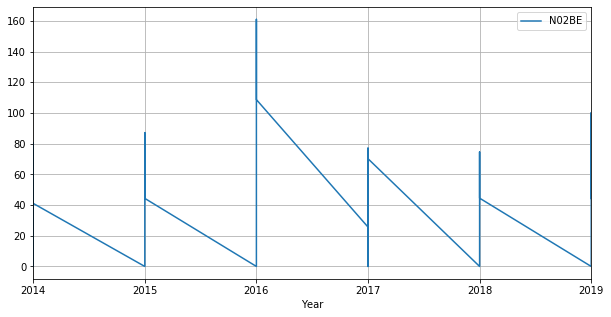

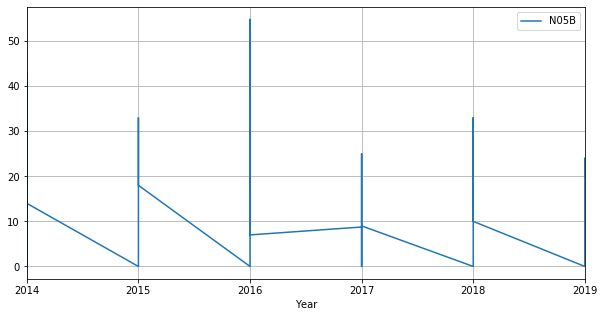

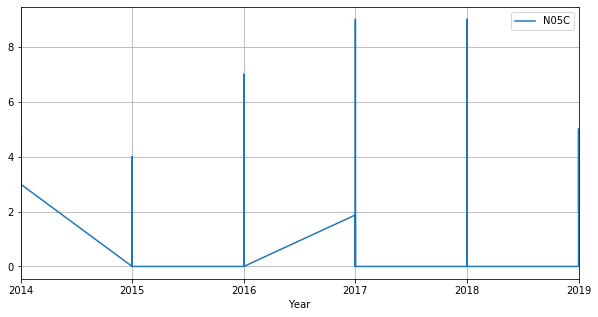

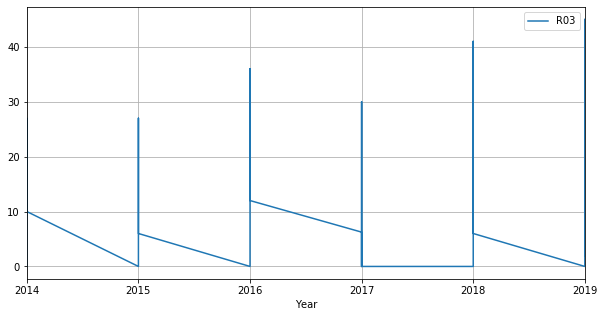

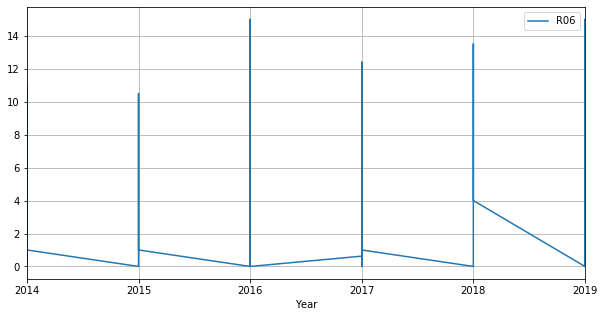

In [21]:
#observe the below plot sales of the drugs are high at starting of the year and less sales at end of the year.
df.plot(x='Year', y=['M01AB'] ,figsize=(10,5), grid=True)
df.plot(x='Year', y=['M01AE'] ,figsize=(10,5), grid=True)
df.plot(x='Year', y=['N02BA'] ,figsize=(10,5), grid=True)
df.plot(x='Year', y=['N02BE'] ,figsize=(10,5), grid=True)
df.plot(x='Year', y=['N05B'] ,figsize=(10,5), grid=True)
df.plot(x='Year', y=['N05C'] ,figsize=(10,5), grid=True)
df.plot(x='Year', y=['R03'] ,figsize=(10,5), grid=True)
df.plot(x='Year', y=['R06'] ,figsize=(10,5), grid=True)

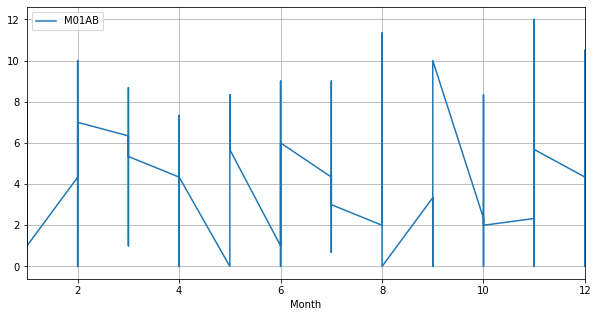

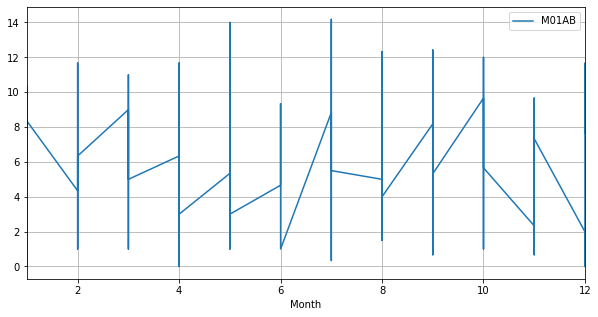

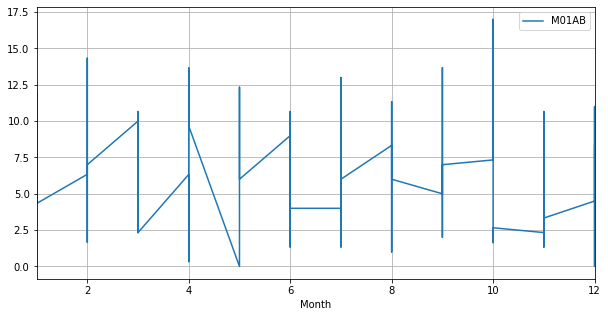

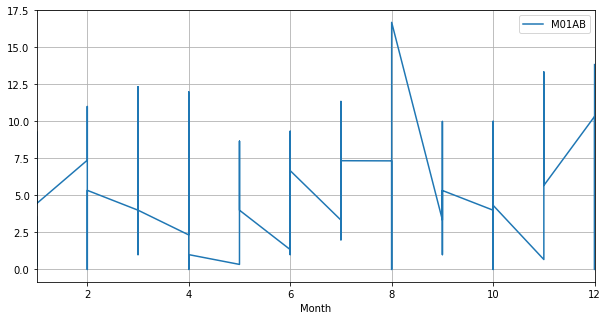

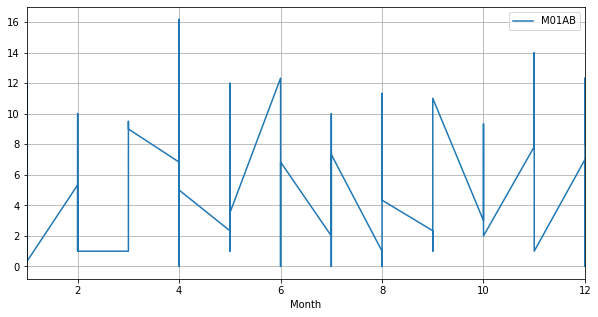

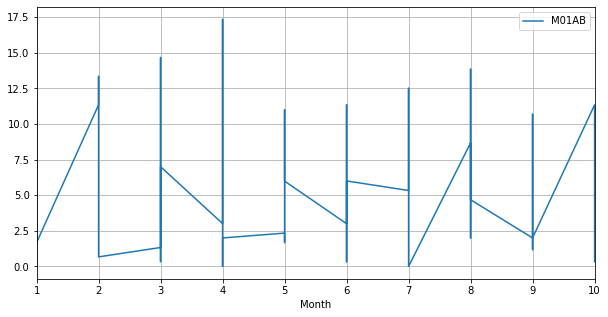

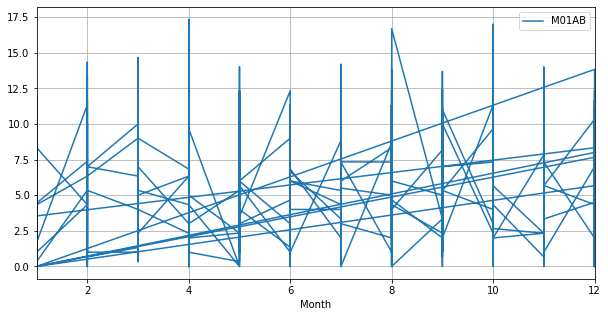

In [22]:
# time series analysis of M01AB by monthly.
df['2014'].plot(x='Month', y=['M01AB'] ,figsize=(10,5), grid=True)
df['2015'].plot(x='Month', y=['M01AB'] ,figsize=(10,5), grid=True)
df['2016'].plot(x='Month', y=['M01AB'] ,figsize=(10,5), grid=True)
df['2017'].plot(x='Month', y=['M01AB'] ,figsize=(10,5), grid=True)
df['2018'].plot(x='Month', y=['M01AB'] ,figsize=(10,5), grid=True)
df['2019'].plot(x='Month', y=['M01AB'] ,figsize=(10,5), grid=True)
df.plot(x='Month', y=['M01AB'] ,figsize=(10,5), grid=True) # it shows all years monthly variation in single plot.

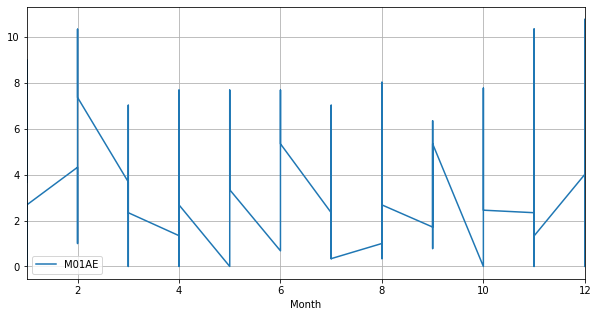

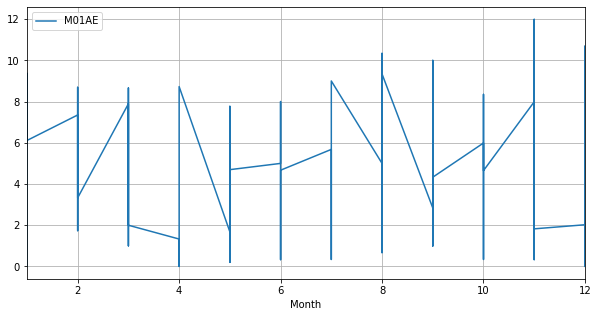

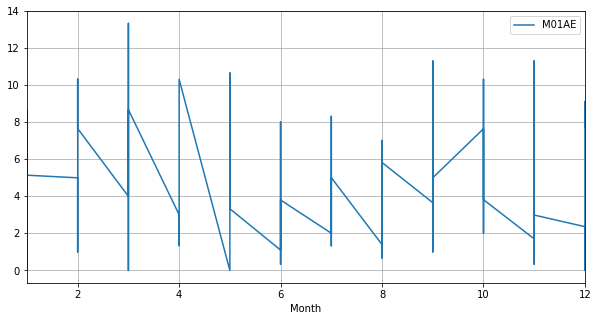

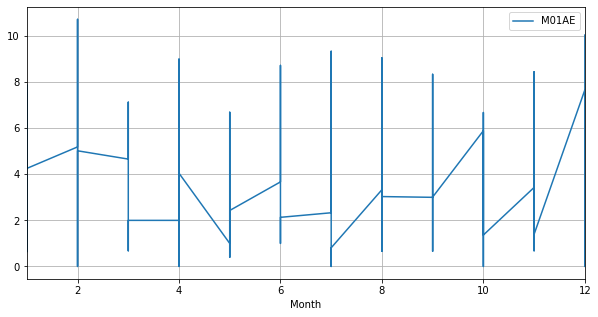

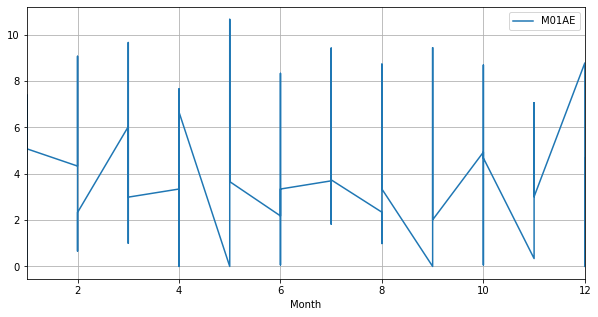

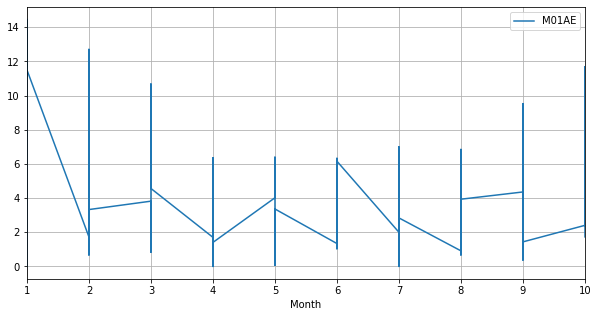

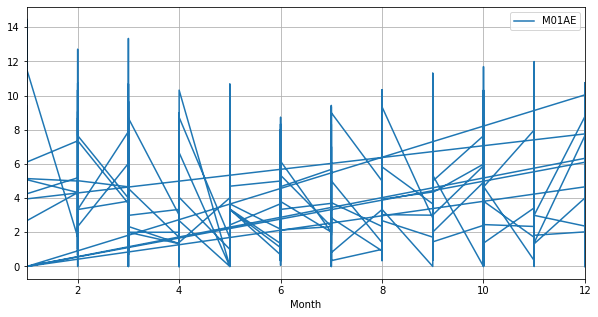

In [23]:
# time series analysis of M01AE by monthly.
df['2014'].plot(x='Month', y=['M01AE'] ,figsize=(10,5), grid=True)
df['2015'].plot(x='Month', y=['M01AE'] ,figsize=(10,5), grid=True)
df['2016'].plot(x='Month', y=['M01AE'] ,figsize=(10,5), grid=True)
df['2017'].plot(x='Month', y=['M01AE'] ,figsize=(10,5), grid=True)
df['2018'].plot(x='Month', y=['M01AE'] ,figsize=(10,5), grid=True)
df['2019'].plot(x='Month', y=['M01AE'] ,figsize=(10,5), grid=True)
df.plot(x='Month', y=['M01AE'] ,figsize=(10,5), grid=True)

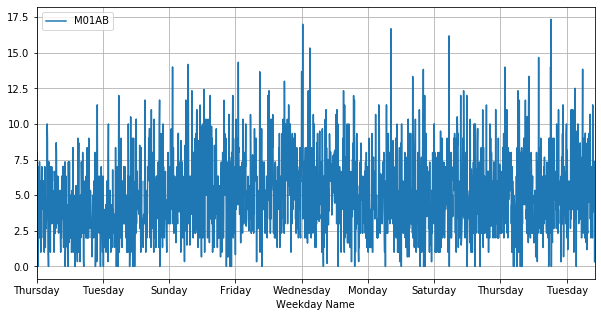

In [24]:
# time series analysis by using week names
'''
df['2014'].plot(x='Weekday Name', y=['M01AB'] ,figsize=(10,5), grid=True)
df['2015'].plot(x='Weekday Name', y=['M01AB'] ,figsize=(10,5), grid=True)
df['2016'].plot(x='Weekday Name', y=['M01AB'] ,figsize=(10,5), grid=True)
df['2017'].plot(x='Weekday Name', y=['M01AB'] ,figsize=(10,5), grid=True)
df['2018'].plot(x='Weekday Name', y=['M01AB'] ,figsize=(10,5), grid=True)
df['2019'].plot(x='Weekday Name', y=['M01AB'] ,figsize=(10,5), grid=True)
'''
df.plot(x='Weekday Name', y=['M01AB'] ,figsize=(10,5), grid=True)

C:\Users\Win10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 276.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


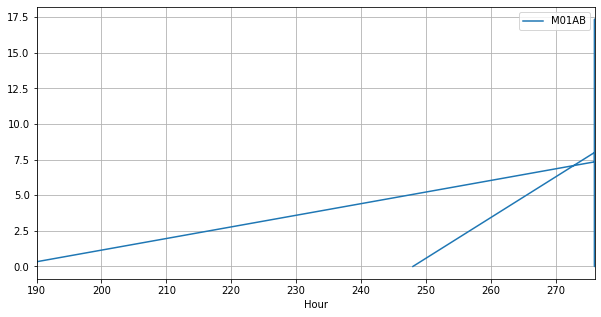

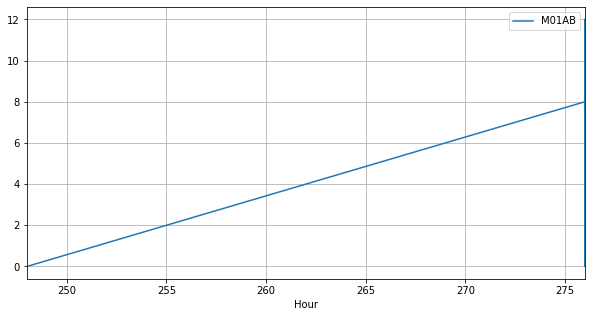

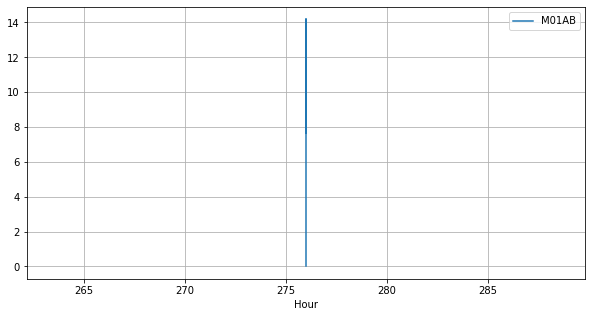

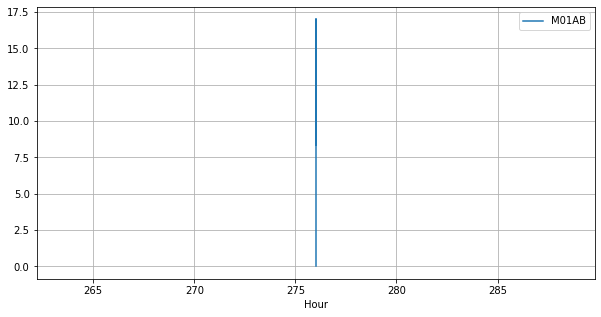

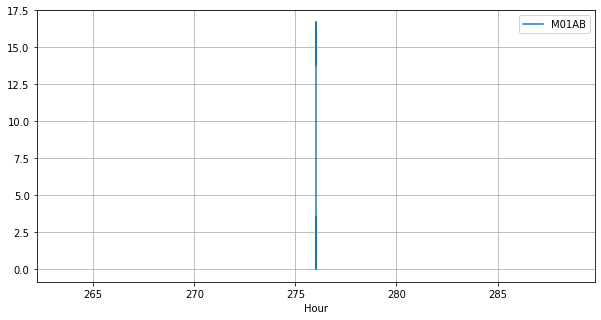

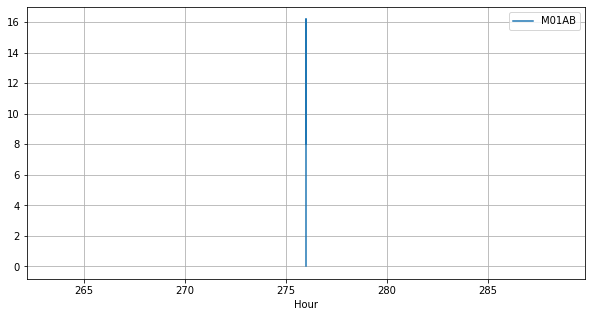

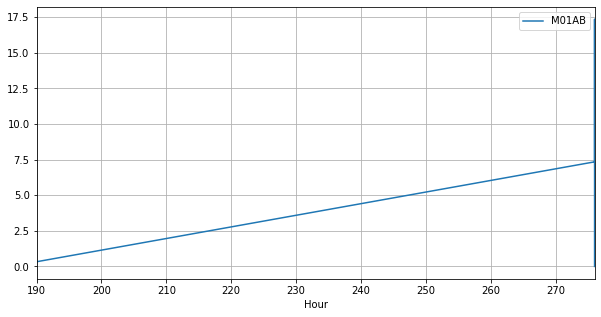

In [25]:
df.plot(x='Hour', y=['M01AB'] ,figsize=(10,5), grid=True)
df['2014'].plot(x='Hour', y=['M01AB'] ,figsize=(10,5), grid=True)
df['2015'].plot(x='Hour', y=['M01AB'] ,figsize=(10,5), grid=True)
df['2016'].plot(x='Hour', y=['M01AB'] ,figsize=(10,5), grid=True)
df['2017'].plot(x='Hour', y=['M01AB'] ,figsize=(10,5), grid=True)
df['2018'].plot(x='Hour', y=['M01AB'] ,figsize=(10,5), grid=True)
df['2019'].plot(x='Hour', y=['M01AB'] ,figsize=(10,5), grid=True)

#### Bring the series to wide sense stationarily using appropriate transformations and decompositions,
#### and analyse using Autocorrelation and Partial Autocorrelation functions. 

In [26]:
#auto correlation funtion
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [27]:
df_M01AB=df['M01AB']
df_M01AB.head(2)

Date
2014-01-02    0.0
2014-01-03    8.0
Name: M01AB, dtype: float64

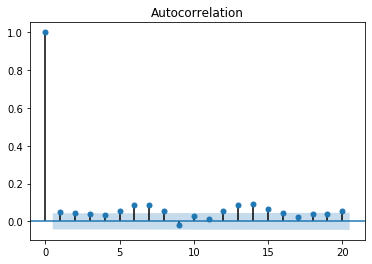

In [28]:
#acf_plot = plot_acf(df_ice_cream.production, lags=100)
acf_plot = plot_acf(df_M01AB,lags=20)

#### ACF isn't that informative

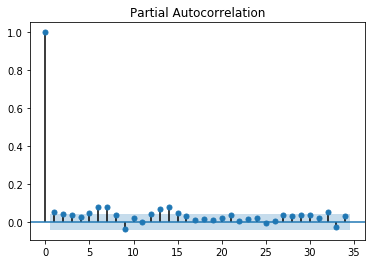

In [29]:
#Partial Autocorrelation functions
pacf_plot = plot_pacf(df_M01AB)

#### PACF also doesn't tell us much

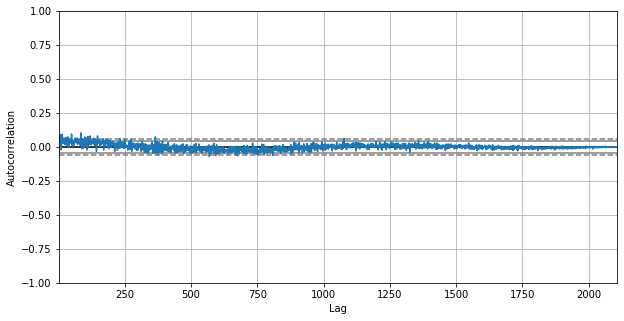

In [30]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,5))
autocorrelation_plot(df_M01AB)

In [31]:
from pandas import concat
from pandas import DataFrame
from matplotlib import pyplot
values = DataFrame(df.M01AB)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.052261
t+1  0.052261  1.000000


It shows a positive correlation (0.05) between the observation and the lag=1 value.

## Estimate the Autoregressive, Moving Average, and differencing degrees, and fit the optimal model.

In [32]:
# auto regression model

# create and evaluate a static autoregressive model
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error


# split dataset
X = df['M01AB']
train, test = X[1:len(X)-7], X[len(X)-7:]


In [33]:
print(train.shape)
print(test.shape)

(2098,)
(7,)


In [34]:
model = AR(train)
model_fit= model.fit()

C:\Users\Win10\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [35]:
window = model_fit.k_ar #Variables
coeff = model_fit.params # Coefficients
#Linear Regression - y= bX1 + bX2 ... + bXn

In [36]:
history = train[len(train) - window:]

In [37]:
len(train) - 29

2069

In [38]:
history = [history[i] for i in range(len(history))]

In [39]:
history

[1.68,
 8.33,
 7.01,
 1.18,
 8.66,
 2.67,
 2.33,
 6.34,
 8.99,
 5.34,
 9.33,
 4.5,
 6.33,
 7.33,
 5.34,
 10.68,
 3.33,
 5.34,
 2.0,
 6.0,
 5.5,
 4.66,
 7.0,
 3.51,
 2.0,
 11.34]

In [40]:
predictions=[]

for t in test:
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    y = coeff[0]
    for d in range(window):       
        y += coeff[d + 1] * lag[window - d - 1]
        #print(coeff[d + 1] * lag[window - d - 1])
    predictions.append(y)
    history.append(t)
    print(f"Predicted :{y} and expected value:{t}")

Predicted :5.24673131055538 and expected value:5.18
Predicted :5.739977799354747 and expected value:5.0
Predicted :5.7234396444991305 and expected value:7.34
Predicted :5.57591555850756 and expected value:3.84
Predicted :5.220801828842478 and expected value:4.0
Predicted :5.248889114232131 and expected value:7.34
Predicted :5.534332112401826 and expected value:0.33


In [41]:
mean_squared_error(test,predictions)

5.589552142664417

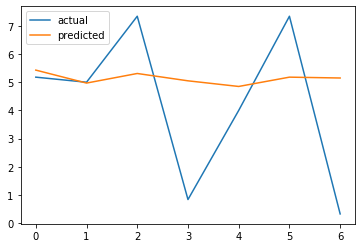

In [42]:
predicted_values=[5.43,4.97,5.31,5.05,4.85,5.18,5.15]
test_values=[5.18,5.0,7.34,.84,4.0,7.34,0.33]
import matplotlib.pyplot as plt
plt.plot(test_values,label='actual')
plt.plot(predicted_values,label='predicted')
plt.legend()

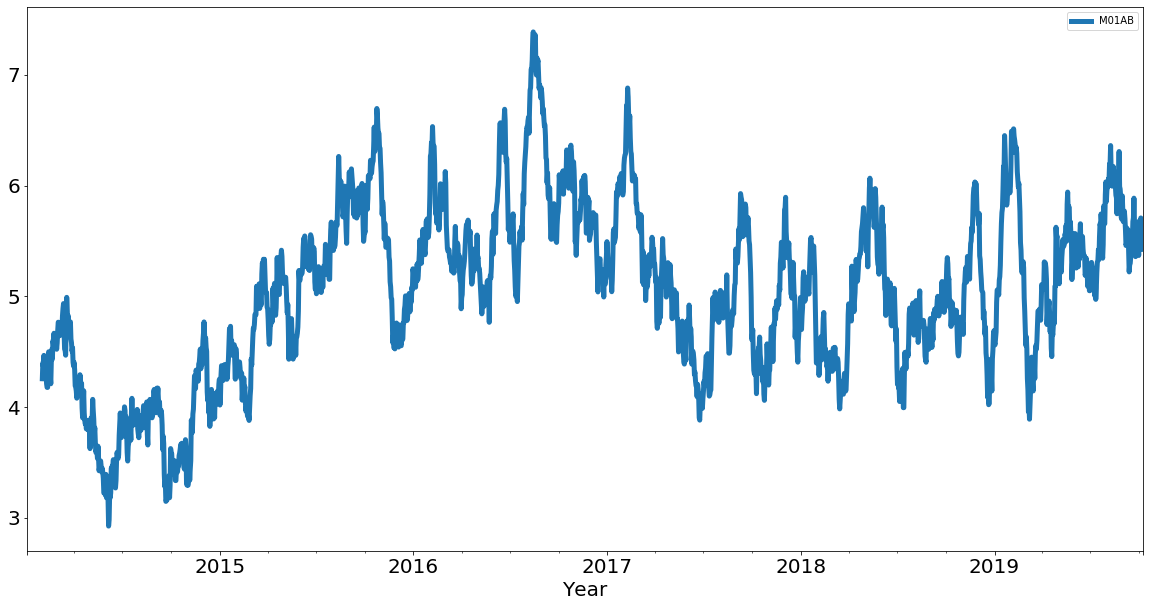

In [43]:
#Moving Average
# Time Series by using rolling avarage
M01AB = df[['M01AB']]
M01AB.rolling(30).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [44]:
# Calculating the short-window simple moving average
short_rolling = df2.rolling(window=20).mean()
short_rolling.head(20)

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
Date,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Calculating the long-window simple moving average
long_rolling = df2.rolling(window=100).mean()
long_rolling.tail()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
Date,,,,,,,,
2019-10-04,5.7251,3.37295,2.9065,23.51605,7.794,0.68,4.264167,3.2920
2019-10-05,5.6819,3.35975,2.9265,23.62005,7.814,0.67,4.194167,3.2753
2019-10-06,5.6786,3.46169,2.9265,23.81605,7.824,0.67,4.224167,3.2873
2019-10-07,5.7402,3.44976,2.9065,24.14105,7.864,0.67,4.274167,3.2773
2019-10-08,5.6835,3.40547,2.9115,24.18405,8.014,0.69,4.184167,3.2273


Text(0, 0.5, 'sales')

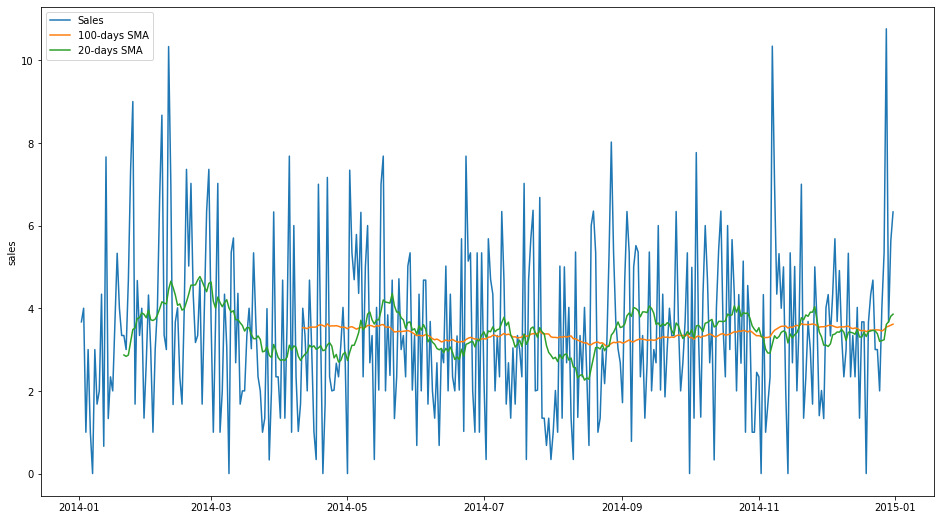

In [46]:
start_date = '2014-01-02'
end_date = '2014-12-31'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df2.loc[start_date:end_date, :].index, df2.loc[start_date:end_date, 'M01AE'], label='Sales')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'M01AE'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'M01AE'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('sales')


Text(0, 0.5, 'Sales')

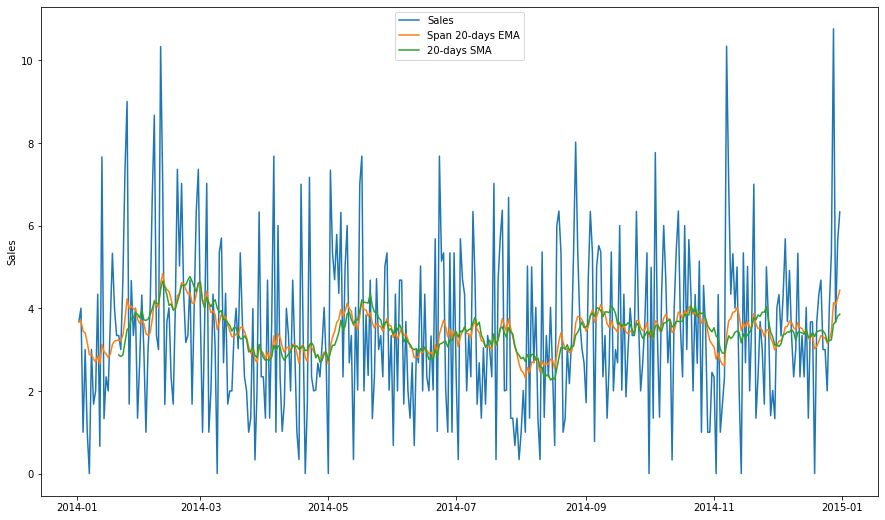

In [47]:
# Using Pandas to calculate a 20-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.
ema_short = df2.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df2.loc[start_date:end_date, :].index, df2.loc[start_date:end_date, 'M01AE'], label='Sales')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'M01AE'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'M01AE'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Sales')

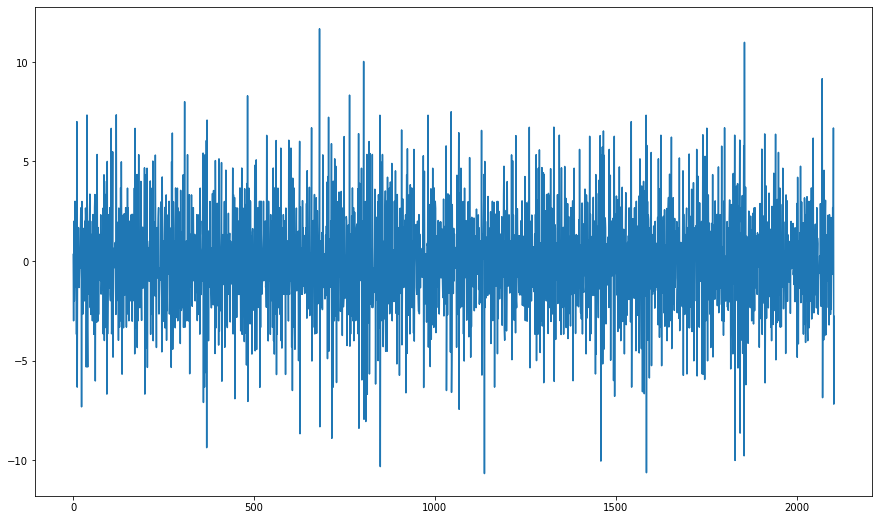

In [48]:
#diffarencing degrees
from pandas import datetime
from pandas import Series
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
# create a differenced series
def difference(df2, interval=1):
    diff = list()
    for i in range(interval, len(df2)):
        value = df2[i] - df2[i - interval]
        diff.append(value)
    return Series(diff)
 
pyplot.subplots(figsize=(15,9))
X = df2['M01AE']
diff = difference(X)
pyplot.plot(diff)

pyplot.show()

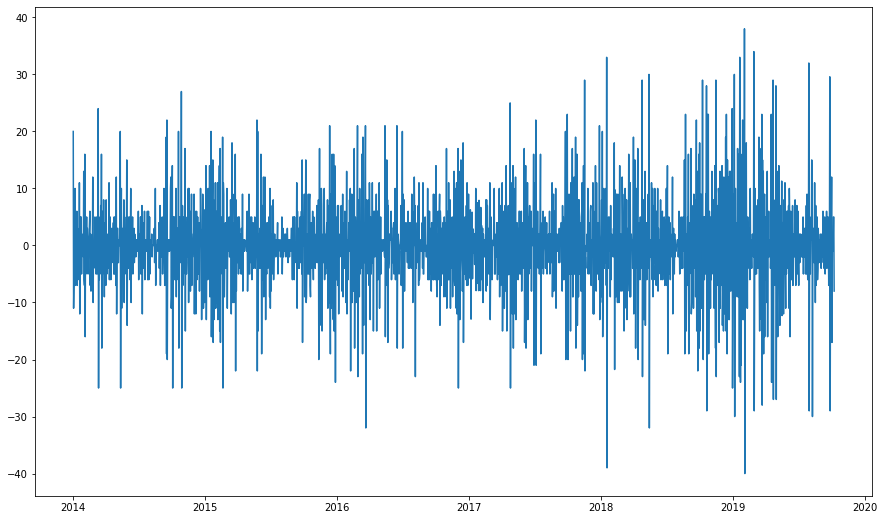

In [49]:
def data(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
pyplot.subplots(figsize=(15,9))

diff = df2['R03'].diff()

pyplot.plot(diff)
pyplot.show()

# Predict the last values of the series

In [50]:
#get train and test data
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime, timedelta
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
M01AB = df[['M01AB']]

#train_end = datetime(2019,12,30)
#test_end = datetime(2020,1,1)
#train_data=M01AB[2014 - 2018]
#df2.loc[start_date:end_date, 'M01AE'], label='Sales')

#test_data=M01AB[2019]
train_data = df2.loc['2014-01-02':'2018-12-31', 'M01AE']
test_data = df2.loc['2019-01-01':'2020-01-01', 'M01AE']

In [51]:
#create the model arima model

model = ARIMA(train_data, order=(0,0,2))

C:\Users\Win10\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [52]:
#fit the model
model_fit = model.fit()

In [53]:
test_data.head()

Date
2019-01-01    0.000
2019-01-02    4.397
2019-01-03    4.836
2019-01-04    3.670
2019-01-05    3.690
Name: M01AE, dtype: float64

In [54]:
#summary of the model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  M01AE   No. Observations:                 1825
Model:                     ARMA(0, 2)   Log Likelihood               -3933.658
Method:                       css-mle   S.D. of innovations              2.089
Date:                Tue, 11 Aug 2020   AIC                           7875.317
Time:                        21:40:28   BIC                           7897.354
Sample:                    01-02-2014   HQIC                          7883.446
                         - 12-31-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.9015      0.053     73.617      0.000       3.798       4.005
ma.L1.M01AE     0.0639      0.023      2.728      0.006       0.018       0.110
ma.L2.M01AE     0.0202      0.023      0.895    

In [55]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
pred_start_date

Timestamp('2019-01-01 00:00:00')

In [56]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
predictions

2019-01-01    4.005050
2019-01-02    3.911575
2019-01-03    3.901483
2019-01-04    3.901483
2019-01-05    3.901483
                ...   
2019-10-04    3.901483
2019-10-05    3.901483
2019-10-06    3.901483
2019-10-07    3.901483
2019-10-08    3.901483
Freq: D, Length: 281, dtype: float64

In [57]:
residuals = test_data - predictions
residuals

Date
2019-01-01   -4.005050
2019-01-02    0.485425
2019-01-03    0.934517
2019-01-04   -0.231483
2019-01-05   -0.211483
                ...   
2019-10-04    1.781517
2019-10-05    1.108517
2019-10-06    7.788517
2019-10-07    0.605517
2019-10-08   -2.171483
Length: 281, dtype: float64

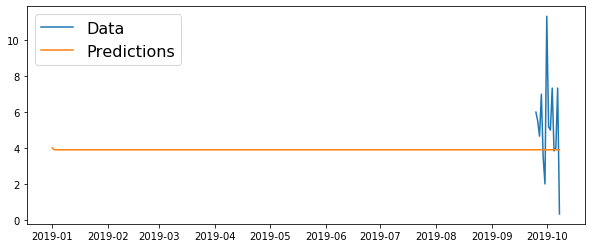

In [58]:
plt.figure(figsize=(10,4))

plt.plot(M01AB[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [59]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: inf


In [60]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 2.373849188723189
